# Handwritten digits classifier
Source: codebasics Tutorial 7.0

### Data preprocessing

#### Install libraries

In [31]:
%pip install tensorflow matplotlib numpy scikit-learn seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


#### Import libraries & Data preprocessing

In [32]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline
import numpy as np

Import Data

In [33]:
(X_train_val, y_train_val), (X_test, y_test) = keras.datasets.mnist.load_data()

Display sample input

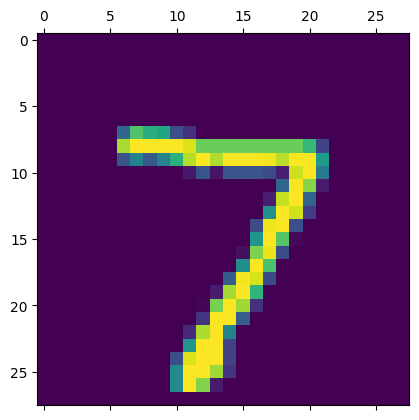

In [34]:
plt.matshow(X_test[0])

Scale data

In [35]:
# Scale the data
X_train_val = X_train_val / 255
X_test = X_test / 255

In [36]:
X_train_val.shape

(60000, 28, 28)

Flatten input vectors

In [ ]:
vectorLength = X_train_val.shape[1] * X_train_val.shape[2]
X_train_val_flattened = X_train_val.reshape(len(X_train_val), vectorLength)
X_test_flattened = X_test.reshape(len(X_test), vectorLength)

Perform train-test-split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train_val_flattened, y_train_val, test_size=0.1, random_state=42)

Determine input & Output dimensions

In [30]:
print(X_train.shape)

(54000, 784)


In [38]:
print(y_train.shape)

(54000,)


### Train & Test model

Train model

In [39]:
model = keras.Sequential([
    keras.layers.Dense(784, input_shape=(vectorLength,), activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, 
          validation_data=(X_val, y_val), epochs=50, 
          callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)])

c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.9414 - loss: 0.1982 - val_accuracy: 0.9723 - val_loss: 0.0950
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9758 - loss: 0.0802 - val_accuracy: 0.9775 - val_loss: 0.0750
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9837 - loss: 0.0515 - val_accuracy: 0.9748 - val_loss: 0.0879
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9881 - loss: 0.0356 - val_accuracy: 0.9810 - val_loss: 0.0600
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9923 - loss: 0.0253 - val_accuracy: 0.9793 - val_loss: 0.0701
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9923 - loss: 0.0227 - val_accuracy: 0.9793 - val_loss: 0.0874
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.9938 - loss: 0.0190 - val_accuracy: 0.9802 - val_loss: 0.0703
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9952 - lo

Test model on test set

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.9812
Recall: 0.9810
Precision: 0.9813
F1 Score: 0.9811


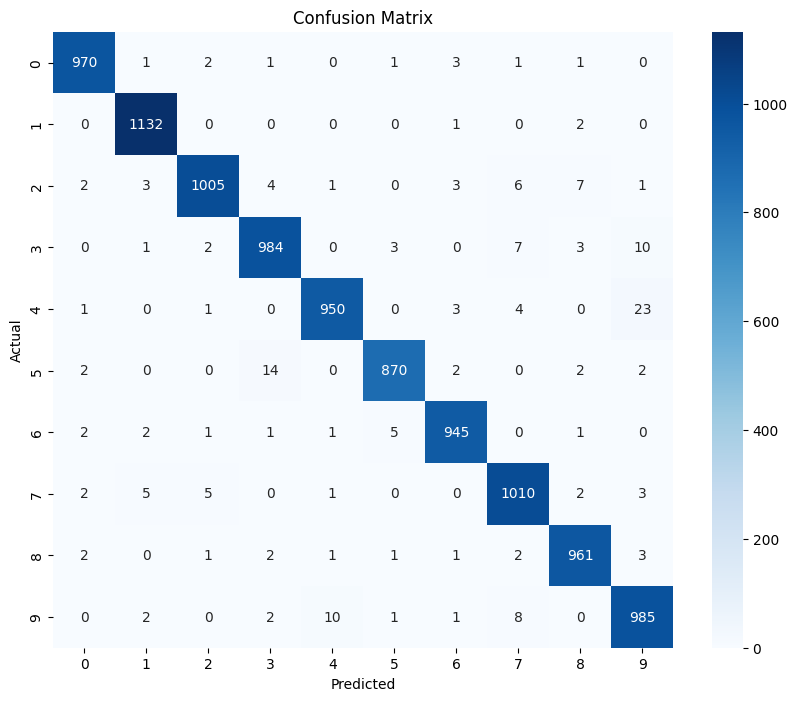

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
import seaborn as sns

# Make predictions
y_pred = model.predict(X_test_flattened)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print metrics
accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Accuracy: {accuracy:.4f}')
recall = recall_score(y_test, y_pred_classes, average='macro')
print(f'Recall: {recall:.4f}')
precision = precision_score(y_test, y_pred_classes, average='macro')
print(f'Precision: {precision:.4f}')
f1 = f1_score(y_test, y_pred_classes, average='macro')
print(f'F1 Score: {f1:.4f}')

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Save model for Node-red use later

In [41]:
import os

# Define the path to save the model
print("Original path: ", os.getcwd())
saved_model_path = './digit_classifier.keras'

# Save the entire model (architecture, optimizer, weights) in the native Keras format
model.save(saved_model_path)

print(f"Model saved to: {saved_model_path}")

Original path:  c:\Users\Asus\OneDrive\Desktop\myProjects\Y3S1\CPT 316\a2
Model saved to: ./digit_classifier.keras
